In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
baseline = pd.read_csv(r"baseline.csv")
finetuned = pd.read_csv(r"baseline_finetuned_pretrained.csv")
trained = pd.read_csv(r"trained_bert.csv")
bidaf = pd.read_csv(r"bidaf.csv")

In [34]:
def stuff(data):
    N = len(data)
    em = np.sum(list(data['Exact match']))
    f1 = np.mean(data['F1 score'])    
    return round(em/N,4)*100, round(f1,3), N

In [35]:
Out = pd.DataFrame()
Model, EM, F1, Len = [],[],[],[]
name = ['baseline', 'finetuned', 'trained', 'bidaf']

for idx,data in enumerate([baseline, finetuned, trained, bidaf]):
    em,f1,ln = stuff(data)
    Model.append(name[idx])
    EM.append(em)
    F1.append(f1)
    Len.append(ln)

Out['Model Name'] = Model
Out['Exact Match %'] = EM
Out['F1 Score Mean'] = F1
Out['Total'] = Len

In [36]:
Out = Out.sort_values('Exact Match %', ascending = False)
Out

,Model Name,Exact Match %,F1 Score Mean,Total
1,finetuned,63.11,0.767,1667
3,bidaf,53.72,0.684,20302
2,trained,10.89,0.170,5544
0,baseline,0.00,0.025,2810


In [42]:
baseline.head()

,Unnamed: 0,Question,Prediction,True Answer,Exact match,F1 score
0,0,In what country is Normandy located?,francia . through generations of assimilation ...,France,False,0.00
1,1,In what country is Normandy located?,were the people who in the 10th and 11th centu...,France,False,0.02
2,2,In what country is Normandy located?,",",France,False,0.00
3,3,In what country is Normandy located?,Not Found,France,False,0.00
4,4,When were the Normans in Normandy?,Not Found,10th and 11th centuries,False,0.00


<AxesSubplot:>

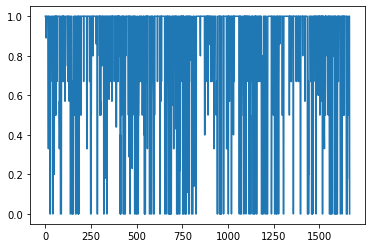

In [44]:
finetuned['F1 score'].plot()

<AxesSubplot:>

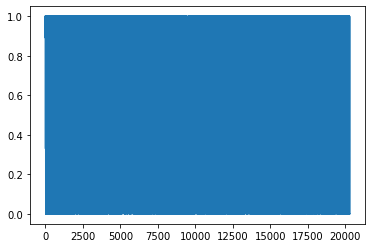

In [46]:
bidaf['F1 score'].plot()